# Importação das bibliotecas básicas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

# Tratamento de Dados Desbalanceados

##  Preparação dos dados

In [2]:
base_census = pd.read_csv(r'C:\Users\brcalazans\Desktop\Pessoal\Machine Learning e Data Science\Bases de dados\census.csv')
base_census.shape

(32561, 15)

In [3]:
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

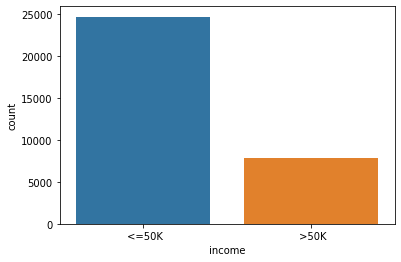

In [5]:
sns.countplot(x=base_census['income']);

## Pré-processamento dos dados

In [6]:
X_census = base_census.iloc[:, 0:14].values
y_census = base_census.iloc[:, 14].values

In [7]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [8]:
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Label Encoder

In [9]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
label_encoder_workclass    = LabelEncoder()
label_encoder_education    = LabelEncoder()
label_econder_marital      = LabelEncoder()
label_econder_occupation   = LabelEncoder()
label_econder_relationship = LabelEncoder()
label_econder_race         = LabelEncoder()
label_econder_sex          = LabelEncoder()
label_econder_country      = LabelEncoder()

In [11]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [12]:
X_census[:,1]  = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3]  = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5]  = label_econder_marital.fit_transform(X_census[:,5])
X_census[:,6]  = label_econder_occupation.fit_transform(X_census[:,6])
X_census[:,7]  = label_econder_relationship.fit_transform(X_census[:,7])
X_census[:,8]  = label_econder_race.fit_transform(X_census[:,8])
X_census[:,9]  = label_econder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_econder_country.fit_transform(X_census[:,13])

In [13]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

## Subamostragem com Tomek Links

In [14]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X_census, y_census)

In [15]:
X_census.shape, y_census.shape

((32561, 14), (32561,))

In [16]:
X_under.shape, y_under.shape

((30162, 14), (30162,))

In [17]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [18]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22321,  7841], dtype=int64))

### One Hot Encoder - Escalonamento dos dados

In [20]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
X_census = onehotencoder.fit_transform(X_under).toarray()
X_census

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [21]:
X_census.shape

(30162, 108)

In [23]:
X_census_treinamento_under, X_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_census_treinamento_under.shape, X_census_teste_under.shape

((25637, 14), (4525, 14))

### Random Forest

In [24]:
random_forest_census = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=100)
random_forest_census.fit(X_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [25]:
previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under, previsoes)

0.8634254143646409

In [29]:
print(classification_report(y_census_teste_under, previsoes))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3380
        >50K       0.76      0.67      0.71      1145

    accuracy                           0.86      4525
   macro avg       0.83      0.80      0.81      4525
weighted avg       0.86      0.86      0.86      4525



## Sobreamostragem com SMOTE

In [14]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

In [15]:
X_over.shape, y_over.shape

((49440, 14), (49440,))

In [16]:
X_census.shape, y_census.shape

((32561, 14), (32561,))

In [17]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [18]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720], dtype=int64))

### One Hot Encoder - Escalonamento dos dados

In [19]:
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')
X_census = onehotencoder.fit_transform(X_over).toarray()
X_census

MemoryError: Unable to allocate 21.1 GiB for an array with shape (49440, 57392) and data type float64

In [20]:
X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_census_treinamento_over.shape, X_census_teste_over.shape

((42024, 14), (7416, 14))

### Random Forest

In [21]:
random_forest_census = RandomForestClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, n_estimators=100)
random_forest_census.fit(X_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [22]:
previsoes = random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over, previsoes)

0.9096548004314995

In [23]:
print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

